In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [2]:
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

In [3]:
import cv2
img_path = "test/CornCommonRust1.JPG"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)

In [4]:
input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], input_arr)

In [5]:
interpreter.invoke()

In [6]:
output_details = interpreter.get_output_details()
output_tensor = interpreter.get_tensor(output_details[0]['index'])

In [7]:
print(output_tensor)

[[1.0864349e-14 2.9920715e-23 1.1589884e-17 2.9461378e-20 3.5232107e-15
  6.0208161e-16 8.6662824e-21 4.1292886e-13 6.9942975e-11 1.3157691e-08
  1.0000000e+00 5.6347674e-12 1.8205814e-14 2.5274940e-20 4.8075143e-20
  5.6244394e-19 1.6621002e-25 4.3248922e-20 3.7762262e-20 8.2590618e-26
  9.9798541e-21 8.4102822e-16 8.9862769e-21 2.4533558e-23 9.2848480e-19
  8.8129995e-22 1.9275075e-21 7.3799249e-16 3.2325831e-17 3.1232846e-23
  1.7547104e-33 9.7471014e-30 5.9501971e-30 6.7706236e-31 2.5622043e-31
  1.0197320e-13 6.8742109e-29 9.0006825e-29 1.3141374e-18 1.1698024e-20
  6.8713835e-09 6.7346924e-23 2.2899855e-21 2.8967003e-22 3.1648999e-17
  6.1955233e-20 1.9735167e-23 5.6874800e-20]]


In [8]:
result_index = np.argmax(output_tensor)
class_name = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Blueberry___healthy',
    'Cherry_(including_sour)___Powdery_mildew',
    'Cherry_(including_sour)___healthy',
    'Cinnamon healthy',
    'Cinnamon leaf spot',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot',
    'Peach___healthy',
    'Pepper,_bell___Bacterial_spot',
    'Pepper,_bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch',
    'Strawberry___healthy',
    'Tea algal leaf',
    'Tea antrhacnose',
    'Tea bird eye spot',
    'Tea brown blight',
    'Tea gray light',
    'Tea healthy',
    'Tea red leaf spot',
    'Tea white spot',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

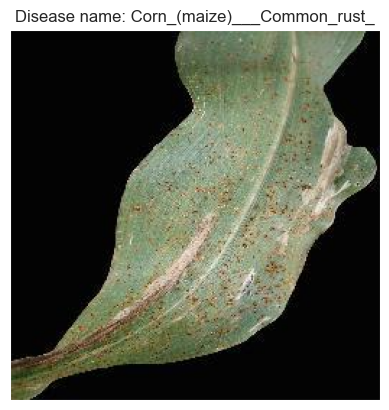

In [9]:
model_prediction = class_name[result_index]

plt.imshow(img)
plt.title(f"Disease name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()